# The Julia Express

### Bogumił Kamiński (http://bogumilkaminski.pl)

## Contents
[Introduction](#introduction)

[Getting around](#gettingaround)

[Basic literals and types](#basicliterals)

[Complex literals and types](#complexliterals)

[Strings](#strings)

[Programming constructs](#programming)

[Variable scoping](#scoping)

[Modules](#modules)

[Operators](#operators)

[Essential general usage functions](#essential)

[Reading and writing data](#io)

[Random numbers](#random)

[Statistics and machine learning](#stats)

[Plotting](#plotting)

[Macros](#macros)

[Taking it all together example](#all)

## <a name="introduction"></a>Inroduction

The Purpose of this document is to introduce programmers to Julia programming by example. This is a simplified exposition of the language.

If some packages are missing on your system use Pkg.add to require installing them. There are many add-on packages
which you can browse at http://pkg.julialang.org/.

Major stuff not covered (please see the documentation):

1. parametric types;
2. parallel and distributed processing;
3. advanced I/O operations;
4. package management; see `Pkg`;
5. interaction with system shell; see `run`;
6. exception handling; see `try`;
7. creation of coroutines; see `Task`;
8. two-way integration with C and Fortran.

You can find current Julia documentation at http://julia.readthedocs.org/en/latest/manual/.

The code was executed using the following Julia version:

In [1]:
versioninfo()

Julia Version 0.5.0
Commit 3c9d753 (2016-09-19 18:14 UTC)
Platform Info:
  System: NT (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz
  WORD_SIZE: 64
  BLAS: libopenblas (USE64BITINT DYNAMIC_ARCH NO_AFFINITY Haswell)
  LAPACK: libopenblas64_
  LIBM: libopenlibm
  LLVM: libLLVM-3.7.1 (ORCJIT, broadwell)


Remember that you can expect every major version of Julia to introduce breaking changes.

Check https://github.com/JuliaLang/julia/blob/master/NEWS.md for release notes.

All sugestions how this guide can be improved are welcomed. Please contact me at [bkamins@sgh.waw.pl](mailto:bkamins@sgh.waw.pl).

## <a name="gettingaround"></a>Getting around

Running julia invokes interactive (REPL) mode. In this mode some useful commands are:

1. ^D (exits Julia, also calling `exit(c)` quits with exit code `c`);
2. ^C (interrupts computations);
3. ? (enters help mode)
4. ; (enters system shell mode)
5. putting ; after the expression will disable showing of its value.

Examples of some essential functions in REPL (they can be also invoked in scripts):

In [2]:
apropos("apropos") # search documentation for "apropos" string

Base.Docs.stripmd
Base.Docs.apropos


In [3]:
@edit max(1,2) # show the definition of max function when invoked with arguments 1 and 2 in text editor

Unknown editor: no line number information passed.
The method is defined at line 280.


In [4]:
whos() # list of global variables and their types

                          Base  36753 KB     Module
                        Compat   5326 KB     Module
                          Core  13237 KB     Module
                        IJulia   6280 KB     Module
                          JSON   5402 KB     Module
                          Main  44350 KB     Module
                        Nettle   5311 KB     Module
                           ZMQ   5322 KB     Module


In [5]:
cd("D:/") # change working directory to D:/ (on Windows)
pwd() # get current working directory

"D:\\"

In [6]:
include("file.jl") # execute source file, LoadError if execution fails

LoadError: LoadError: could not open file D:\file.jl
while loading In[6], in expression starting on line 1

In [7]:
clipboard([1,2]) # copy data to system clipboard
clipboard() # load data from system clipboard as string

"[1,2]"

In [8]:
workspace() # clear worskspace - create new Main module (only to be used interactively)

You can execute Julia script by running `julia script.jl`.

Try saving the following example script to a file and run it (more examples of all the constructs used are given in
following sections):

In [9]:
"Sieve of Eratosthenes function docstring"
function es(n::Int) # accepts one integer argument
    isprime = ones(Bool, n) # n-element vector of true-s
    isprime[1] = false # 1 is not a prime
    for i in 2:round(Int, sqrt(n)) # loop integers from 2 to sqrt(n)
        if isprime[i] # conditional evaluation
            for j in (i*i):i:n # sequence with step i
                isprime[j] = false
            end
        end
    end
    return filter(x -> isprime[x], 1:n) # filter using anonymous function
end
println(es(100)) # print all primes less or equal than 100
@time length(es(10^7)) # check function execution time and memory usage

[2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97]
  0.171362 seconds (147 allocations: 24.152 MB, 4.19% gc time)


664579

## <a name="basicliterals"></a>Basic literals and types

Basic scalar literals (`x::Type` is a literal `x` with type `Type` assertion):

In [10]:
1::Int64 # 64-bit integer, no overflow warnings, fails on 32 bit Julia

1

In [11]:
1.0::Float64 # 64-bit float, defines NaN, -Inf, Inf

1.0

In [12]:
true::Bool # boolean, allows "true" and "false"

true

In [13]:
'c'::Char # character, allows Unicode

'c'

In [14]:
"s"::AbstractString # strings, allows Unicode, see also Strings

"s"

All basic types are immutable. Specifying type assertion is optional (and usually it is not needed, but I give it to show
how you can do it). Type assertions for variables are made in the same way and may improve code performance.

If you do not specify type assertion Julia will choose a default. Note that defaults might be different on 32-bit and
64-bit versions of Julia. A most important difference is for integers which are `Int32` and `Int64` respectively. This means
that `1::Int32` assertion will fail on 64-bit version. Notably `Int` is either `Int64` or `Int32` depending on version (the same
with `UInt`).
There is no automatic type conversion (especially important in function calls). Has to be explicit:

In [15]:
Int64('a') # character to integer

97

In [16]:
Int64(2.0) # float to integer

2

In [17]:
Int64(1.3) # inexact error

LoadError: LoadError: InexactError()
while loading In[17], in expression starting on line 1

In [18]:
Int64("a") # error no conversion possible

LoadError: LoadError: MethodError: Cannot `convert` an object of type String to an object of type Int64
This may have arisen from a call to the constructor Int64(...),
since type constructors fall back to convert methods.
while loading In[18], in expression starting on line 1

In [19]:
Float64(1) # integer to float

1.0

In [20]:
Bool(1) # converts to boolean true

true

In [21]:
Bool(0) # converts to boolean false

false

In [22]:
Bool(2) # conversion error

LoadError: LoadError: InexactError()
while loading In[22], in expression starting on line 1

In [23]:
Char(89) # integer to char

'Y'

In [24]:
string(true) # cast bool to string (works with other types, note small caps)

"true"

In [25]:
string(1,true) # string can take more than one argument and concatenate them

"1true"

In [26]:
zero(10.0) # zero of type of 10.0

0.0

In [27]:
one(Int64) # one of type Int64

1

General conversion can be done using `convert(Type, x)`:

In [28]:
convert(Int64, 1.0) # convert float to integer

1

Parsing strings can be done using `parse(Type, str)`:

In [29]:
parse(Int64, "1") # parse "1" string as Int64

1

Automatic promotion ofmany arguments to common type (if any) using `promote`:

In [30]:
promote(true, BigInt(1)//3, 1.0) # tuple (see Tuples) of BigFloats, true promoted to 1.0

(1.000000000000000000000000000000000000000000000000000000000000000000000000000000,3.333333333333333333333333333333333333333333333333333333333333333333333333333348e-01,1.000000000000000000000000000000000000000000000000000000000000000000000000000000)

In [31]:
promote("a", 1) # promotion to common type not possible

("a",1)

Many operations (arithmetic, assignment) are defined in a way that performs automatic type promotion.
One can verify type of argument:

In [32]:
typeof("abc") # String returned which is a AbstractString subtype

String

In [33]:
isa("abc", AbstractString) # true

true

In [34]:
isa(1, Float64) # false, integer is not a float

false

In [35]:
isa(1.0, Float64) # true

true

In [36]:
isa(1.0, Number) # true, Number is abstract type

true

In [37]:
supertype(Int64) # supertype of Int64

Signed

In [38]:
subtypes(Real) # subtypes of bastract type Real

4-element Array{Any,1}:
 AbstractFloat       
 Integer             
 Irrational{sym}     
 Rational{T<:Integer}

In [39]:
subtypes(Int64)

0-element Array{Any,1}

It is possible to performcalculations using arbitrary precision arithmetic or rational numbers:

In [40]:
BigInt(10)^1000 # big integer

1000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [41]:
BigFloat(10)^1000 # big float, see documentation how to change default precision

1.000000000000000000000000000000000000000000000000000000000000000000000000000004e+1000

In [42]:
123//456 # rational numbers are created using // operator

41//152

Type hierarchy of all standard numeric types is given below:

In [43]:
function type_hierarchy(t::DataType, level = 0)
    println(" "^level, t)
    for x in subtypes(t)
        type_hierarchy(x, level+2)
    end
end
type_hierarchy(Number)

Number
  Complex{T<:Real}
  Real
    AbstractFloat
      BigFloat
      Float16
      Float32
      Float64
    Integer
      BigInt
      Bool
      Signed
        Int128
        Int16
        Int32
        Int64
        Int8
      Unsigned
        UInt128
        UInt16
        UInt32
        UInt64
        UInt8
    Irrational{sym}
    Rational{T<:Integer}


## <a name="complexliterals"></a>Complex literals and types
Important types:

In [44]:
Any # all objects are of this type

Any

In [45]:
Union{} # subtype of all types, no object can have this type

Union{}

In [46]:
Void # type indicating nothing, subtype of Any

Void

In [47]:
nothing # only instance of Void

Additionally `#undef` indicates an incompletely initialized instance.

### Tuples
Tuples are immutable sequences indexed from `1`:

In [48]:
() # empty tuple

()

In [49]:
(1,) # one element tuple

(1,)

In [50]:
("a", 1) # two element tuple

("a",1)

In [51]:
('a', false)::Tuple{Char, Bool} # tuple type assertion

('a',false)

In [52]:
x = (1, 2, 3)

(1,2,3)

In [53]:
x[1] # 1 (element)

1

In [54]:
x[1:2] # (1, 2) (tuple)

(1,2)

In [55]:
x[4] # bounds error

LoadError: LoadError: BoundsError: attempt to access (1,2,3)
  at index [4]
while loading In[55], in expression starting on line 1

In [56]:
x[1] = 1 # error - tuple is not mutable

LoadError: LoadError: MethodError: no method matching setindex!(::Tuple{Int64,Int64,Int64}, ::Int64, ::Int64)
while loading In[56], in expression starting on line 1

In [57]:
a, b = x # tuple unpacking a=1, b=2
println("$a $b")

1 2


### Arrays
Arrays are mutable and passed by reference. Array creation:

In [58]:
Array(Char, 2, 3, 4) # 2x3x4 array of Chars

2×3×4 Array{Char,3}:
[:, :, 1] =
 '\0'  '\0'  '\0'
 '\0'  '\0'  '\0'

[:, :, 2] =
 '\0'  '\0'  '\0'
 '\0'  '\0'  '\0'

[:, :, 3] =
 '\0'  '\x06'  '\0'
 '\0'  '\0'    '\0'

[:, :, 4] =
 '\b'  '\0'  '\0'
 '\0'  '\0'  '\0'

In [59]:
Array{Int64}(0, 0) # degenerate 0x0 array of Int64

0×0 Array{Int64,2}

In [60]:
Array{Any}(2, 3) # 2x3 array of Any

2×3 Array{Any,2}:
 #undef  #undef  #undef
 #undef  #undef  #undef

In [61]:
zeros(5) # vector of Float64 zeros

5-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0

In [62]:
ones(5) # vector of Float64 ones

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [63]:
ones(Int64, 2, 1) # 2x1 array of Int64 ones

2×1 Array{Int64,2}:
 1
 1

In [64]:
trues(3), falses(3) # tuple of vector of trues and of falses

(Bool[true,true,true],Bool[false,false,false])

In [65]:
eye(3) # 3x3 Float64 identity matrix

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [66]:
x = linspace(1, 2, 5) # iterator having 5 equally spaced elements

5-element LinSpace{Float64}:
 1.0,1.25,1.5,1.75,2.0

In [67]:
collect(x) # converts iterator to vector

5-element Array{Float64,1}:
 1.0 
 1.25
 1.5 
 1.75
 2.0 

In [68]:
1:10 # iterable from 1 to 10

1:10

In [69]:
1:2:10 # iterable from 1 to 9 with 2 skip

1:2:9

In [70]:
reshape(1:12, 3, 4) # 3x4 array filled with 1:12 values

3×4 Base.ReshapedArray{Int64,2,UnitRange{Int64},Tuple{}}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [71]:
fill("a", 2, 2) # 2x2 array filled with "a"

2×2 Array{String,2}:
 "a"  "a"
 "a"  "a"

In [72]:
repmat(eye(2), 3, 2) # 2x2 identity matrix repeated 3x2 times

6×4 Array{Float64,2}:
 1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0
 1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0
 1.0  0.0  1.0  0.0
 0.0  1.0  0.0  1.0

In [73]:
x = [1, 2] # two element vector

2-element Array{Int64,1}:
 1
 2

In [74]:
resize!(x, 5) # resize x in place to hold 5 values (filled with garbage)

5-element Array{Int64,1}:
      1
      2
 569348
      0
      0

In [75]:
[1] # vector with one element (not a scalar)

1-element Array{Int64,1}:
 1

In [76]:
[x * y for x in 1:2, y in 1:3] # comprehension generating 2x3 array

2×3 Array{Int64,2}:
 1  2  3
 2  4  6

In [77]:
Float64[x^2 for x in 1:4] # casting comprehension result to Float64

4-element Array{Float64,1}:
  1.0
  4.0
  9.0
 16.0

In [78]:
[1 2] # 1x2 matrix (hcat function)

1×2 Array{Int64,2}:
 1  2

In [79]:
[1 2]' # 2x1 matrix (after transposing)

2×1 Array{Int64,2}:
 1
 2

In [80]:
[1, 2] # vector (concatenation)

2-element Array{Int64,1}:
 1
 2

In [81]:
[1; 2] # vector (vcat function)

2-element Array{Int64,1}:
 1
 2

In [82]:
[1 2 3; 1 2 3] # 2x3 matrix (hvcat function)

2×3 Array{Int64,2}:
 1  2  3
 1  2  3

In [83]:
[1; 2] == [1 2]' # false, different array dimensions

false

In [84]:
[(1, 2)] # 1-element vector

1-element Array{Tuple{Int64,Int64},1}:
 (1,2)

In [85]:
collect((1, 2)) # 2-element vector by tuple unpacking

2-element Array{Int64,1}:
 1
 2

In [86]:
[[1 2] 3] # append to a row vector (hcat)

1×3 Array{Int64,2}:
 1  2  3

In [87]:
[[1; 2]; 3] # append to a column vector (vcat)

3-element Array{Int64,1}:
 1
 2
 3

Vectors (1D arrays) are treated as column vectors.

Julia offers sparse and distributed matrices (see documentation for details).

Commonly needed array utility functions:

In [88]:
a = [x * y for x in 1:2, y in 1, z in 1:3] # 2x3 array of Int64; singelton dimension is dropped

2×3 Array{Int64,2}:
 1  1  1
 2  2  2

In [89]:
a = [x * y for x in 1:2, y in 1:1, z in 1:3] # 2x1x3 array of Int64; singelton dimension is not dropped

2×1×3 Array{Int64,3}:
[:, :, 1] =
 1
 2

[:, :, 2] =
 1
 2

[:, :, 3] =
 1
 2

In [90]:
ndims(a) # number of dimensions in a

3

In [91]:
eltype(a) # type of elements in a

Int64

In [92]:
length(a) # number of elements in a

6

In [93]:
size(a) # tuple containing dimension sizes of a

(2,1,3)

In [94]:
vec(a) # cast array to vetor (single dimension)

6-element Array{Int64,1}:
 1
 2
 1
 2
 1
 2

In [95]:
squeeze(a, 2) # remove 2nd dimension as it has size 1

2×3 Array{Int64,2}:
 1  1  1
 2  2  2

In [96]:
sum(a, 3) # calculate sums for 3rd dimensions, similarly: mean, std, prod, minimum, maximum, any, all

2×1×1 Array{Int64,3}:
[:, :, 1] =
 3
 6

In [97]:
count(x -> x > 0, a) # count number of times a predicate is true, similar: all, any

6

Array access functions:

In [98]:
a = linspace(0, 1) # LinSpace{Float64} of length 50

50-element LinSpace{Float64}:
 0.0,0.0204082,0.0408163,0.0612245,0.0816327,…,0.938776,0.959184,0.979592,1.0

In [99]:
a[1] # get scalar 0.0

0.0

In [100]:
a[end] # get scalar 1.0 (last position)

1.0

In [101]:
a[1:2:end] # every second element from range, LinSpace{Float64}

25-element LinSpace{Float64}:
 0.0,0.0408163,0.0816327,0.122449,…,0.857143,0.897959,0.938776,0.979592

In [102]:
a[repmat([true, false], 25)] # select every second element, Array{Float64,1}

25-element Array{Float64,1}:
 0.0      
 0.0408163
 0.0816327
 0.122449 
 0.163265 
 0.204082 
 0.244898 
 0.285714 
 0.326531 
 0.367347 
 0.408163 
 0.44898  
 0.489796 
 0.530612 
 0.571429 
 0.612245 
 0.653061 
 0.693878 
 0.734694 
 0.77551  
 0.816327 
 0.857143 
 0.897959 
 0.938776 
 0.979592 

In [103]:
a[[1, 3, 6]] # 1st, 3rd and 6th element of a, Array{Float64,1}

3-element Array{Float64,1}:
 0.0      
 0.0408163
 0.102041 

In [104]:
view(a, 1:2:50) # view into subsarray of a

25-element SubArray{Float64,1,LinSpace{Float64},Tuple{StepRange{Int64,Int64}},true}:
 0.0      
 0.0408163
 0.0816327
 0.122449 
 0.163265 
 0.204082 
 0.244898 
 0.285714 
 0.326531 
 0.367347 
 0.408163 
 0.44898  
 0.489796 
 0.530612 
 0.571429 
 0.612245 
 0.653061 
 0.693878 
 0.734694 
 0.77551  
 0.816327 
 0.857143 
 0.897959 
 0.938776 
 0.979592 

In [105]:
endof(a) # last index of the collection a

50

Observe the treatment of trailing singleton dimensions:

In [106]:
a = reshape(1:12, 3, 4)

3×4 Base.ReshapedArray{Int64,2,UnitRange{Int64},Tuple{}}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [107]:
a[:, 1:2] # 3x2 matrix

3×2 Array{Int64,2}:
 1  4
 2  5
 3  6

In [108]:
a[:, 1] # 3 element vector

3-element Array{Int64,1}:
 1
 2
 3

In [109]:
a[1, :] # 4 element vector

4-element Array{Int64,1}:
  1
  4
  7
 10

In [110]:
a[1:1, :] # 1x4 matrix

1×4 Array{Int64,2}:
 1  4  7  10

In [111]:
a[:, :, 1, 1] # works 3x4 matrix

3×4 Array{Int64,2}:
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [112]:
a[:, :, :, [true]] # wroks 3x4x1 matrix

3×4×1 Array{Int64,3}:
[:, :, 1] =
 1  4  7  10
 2  5  8  11
 3  6  9  12

In [113]:
a[1, 1, [false]] # works 0-element Array{Int64,1}

0-element Array{Int64,1}

Array assignment:

In [114]:
x = collect(reshape(1:8, 2, 4))

2×4 Array{Int64,2}:
 1  3  5  7
 2  4  6  8

In [115]:
x[:, 2:3] = [1 2] # error; size mismatch

LoadError: LoadError: DimensionMismatch("tried to assign 1×2 array to 2×2 destination")
while loading In[115], in expression starting on line 1

In [116]:
x[:, 2:3] = repmat([1 2], 2) # OK

2×2 Array{Int64,2}:
 1  2
 1  2

In [117]:
x[:, 2:3] = 3 # OK

3

Arrays are assigned and passed by reference. Therefore copying is provided:

In [118]:
x = Array{Any}(2)
x[1] = ones(2)
x[2] = trues(3)
a = x
b = copy(x) # shallow copy
c = deepcopy(x) # deep copy
x[1] = "Bang"
x[2][1] = false
x

2-element Array{Any,1}:
 "Bang"               
 Bool[false,true,true]

In [119]:
a # identical as x

2-element Array{Any,1}:
 "Bang"               
 Bool[false,true,true]

In [120]:
b # only x[2][1] changed from original x

2-element Array{Any,1}:
 [1.0,1.0]            
 Bool[false,true,true]

In [121]:
c # contents to original x

2-element Array{Any,1}:
 [1.0,1.0]           
 Bool[true,true,true]

Array types syntax examples:

In [122]:
[1 2]::Array{Int64, 2} # 2 dimensional array of Int64

1×2 Array{Int64,2}:
 1  2

In [123]:
[true; false]::Vector{Bool} # vector of Bool

2-element Array{Bool,1}:
  true
 false

In [124]:
[1 2; 3 4]::Matrix{Int64} # matrix of Int64

2×2 Array{Int64,2}:
 1  2
 3  4

### Composite types

Composite types are mutable and passed by reference.
You can define and access composite types:

In [125]:
type Point
    x::Int64
    y::Float64
    meta
end
p = Point(0, 0.0, "Origin")

Point(0,0.0,"Origin")

In [126]:
p.x # access field

0

In [127]:
p.meta = 2 # change field value

2

In [128]:
p.x = 1.5 # error, wrong data type

LoadError: LoadError: InexactError()
while loading In[128], in expression starting on line 1

In [129]:
p.z = 1 # error - no such field

LoadError: LoadError: type Point has no field z
while loading In[129], in expression starting on line 1

In [130]:
fieldnames(p) # get names of instance fields

3-element Array{Symbol,1}:
 :x   
 :y   
 :meta

In [131]:
fieldnames(Point) # get names of type fields

3-element Array{Symbol,1}:
 :x   
 :y   
 :meta

You can define type to be `immutable` by replacing type by immutable. There are also union types (see documentation
for details).

### Dictionaries

Associative collections (key-value dictionaries):

In [132]:
x = Dict{Float64, Int64}() # empty dictionary mapping floats to integers

Dict{Float64,Int64} with 0 entries

In [133]:
y = Dict("a"=>1, "b"=>2) # filled dictionary

Dict{String,Int64} with 2 entries:
  "b" => 2
  "a" => 1

In [134]:
y["a"] # element retrieval

1

In [135]:
y["c"] # error

LoadError: LoadError: KeyError: key "c" not found
while loading In[135], in expression starting on line 1

In [136]:
y["c"] = 3 # added element

3

In [137]:
haskey(y, "b") # check if y contains key "b"

true

In [138]:
keys(y), values(y) # tuple of iterators returning keys and values in y

(String["c","b","a"],[3,2,1])

In [139]:
delete!(y, "b") # delete key from a collection, see also: pop!

Dict{String,Int64} with 2 entries:
  "c" => 3
  "a" => 1

In [140]:
get(y,"c","default") # return y["c"] or "default" if not haskey(y,"c")

3

Julia also supports operations on sets and dequeues, priority queues and heaps (please refer to documentation).

## <a name="strings"></a>Strings

String operations:

In [141]:
"Hi " * "there!" # string concatenation

"Hi there!"

In [142]:
"Ho " ^ 3 # repeat string

"Ho Ho Ho "

In [143]:
string("a= ", 123.3) # create using print function

"a= 123.3"

In [144]:
repr(123.3) # fetch value of show function to a string

"123.3"

In [145]:
contains("ABCD", "CD") # check if first string contains second

true

In [146]:
"\"\n\t\$" # C-like escaping in strings, new \$ escape

"\"\n\t\$"

In [147]:
x = 123
"$x + 3 = $(x+3)" # unescaped $ is used for interpolation

"123 + 3 = 126"

In [148]:
"\$199" # to get a $ symbol you must escape it

"\$199"

PCRE regular expressions handling:

In [149]:
r = r"A|B" # create new regexp

r"A|B"

In [150]:
ismatch(r, "CD") # false, no match found

false

In [151]:
m = match(r, "ACBD") # find first regexp match, see documentation for details

RegexMatch("A")

There is a vast number of string functions—please refer to documentation.

## <a name="programming"></a>Programming constructs

The simplest way to create new variable is by assignment:

In [152]:
x = 1.0 # x is Float64

1.0

In [153]:
x = 1 # now x is Int32 on 32 bit machine and Int64 on 64 bit machine

1

Expressions can be compound using ; or begin end block:

In [154]:
x = (a = 1; 2 * a) # after: x = 2; a = 1
(x, a)

(2,1)

In [155]:
y = begin
    b = 3
    3 * b
end # after: y = 9; b = 3
(y, b)

(9,3)

There are standard programming constructs:

In [156]:
if false # if clause requires Bool test
    z = 1
elseif 1==2
    z = 2
else
    a = 3
end # after this a = 3 and z is undefined
(a, isdefined(:z))

(3,false)

In [157]:
1==2 ? "A" : "B" # standard ternary operator

"B"

In [158]:
i = 1
while true
    i += 1
    if i > 10
        break
    end
end
i

11

In [159]:
for x in 1:10 # x in collection, can also use = here instead of in
    if 3 < x < 6
        continue # skip one iteration
    end
    println(x)
end # x is introduced in loop outer scope
x

1
2
3
6
7
8
9
10


10

You can define your own functions:

In [160]:
f(x, y = 10) = x + y # new function f with y defaulting to 10; last result returned
f(3, 2) # simple call, 5 returned

5

In [161]:
f(3) # 13 returned

13

In [162]:
function g(x::Int, y::Int) # type restriction
return y, x # explicit return of a tuple
end
g(x::Int, y::Bool) = x * y # add multiple dispatch
g(2, true) # second definition is invoked

2

In [163]:
methods(g) # list all methods defined for g

# 2 methods for generic function "g":
g(x::Int64, y::Bool) at In[162]:4
g(x::Int64, y::Int64) at In[162]:2

In [164]:
(x -> x^2)(3) # anonymous function with a call

9

In [165]:
() -> 0 # anonymous function with no arguments

(::#13) (generic function with 1 method)

In [166]:
h(x...) = sum(x)/length(x) - mean(x) # vararg function; x is a tuple
h(1, 2, 3) # result is 0

0.0

In [167]:
x = (2, 3) # tuple
f(x) # error

LoadError: LoadError: MethodError: no method matching +(::Tuple{Int64,Int64}, ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:138
  +(!Matched::Complex{Bool}, ::Real) at complex.jl:151
  +(!Matched::Char, ::Integer) at char.jl:40
  ...
while loading In[167], in expression starting on line 2

In [168]:
f(x...) # OK - tuple unpacking

5

In [169]:
s(x; a = 1, b = 1) = x * a / b # function with keyword arguments a and b
s(3, b = 2) # call with keyword argument

1.5

In [170]:
x1(; x::Int64 = 2) = x # single keyword argument
x1() # 2 returned

2

In [171]:
x2(; x::Bool = true) = x # no multiple dispatch for keyword arguments; function overwritten
x2() # true; old function was overwritten

true

In [172]:
q(f::Function, x) = 2 * f(x) # simple function wrapper
q(x -> 2x, 10) # 40 returned, no need to use * in 2x (means 2*x)

40

In [173]:
q(10) do x # creation of anonymous function by do construct, useful eg. in IO
    2 * x
end

40

In [174]:
m = reshape(1:12, 3, 4)
map(x -> x ^ 2, m) # 3x4 array returned with transformed data

3×4 Array{Int64,2}:
 1  16  49  100
 4  25  64  121
 9  36  81  144

In [175]:
filter(x -> bits(x)[end] == '0', 1:12) # a fancy way to choose even integers from the range

6-element Array{Int64,1}:
  2
  4
  6
  8
 10
 12

As a convention functions with name ending with ! change their arguments in-place. See for example `resize!` in this
document.
    
Default function argument beasts:

In [176]:
y = 10
f1(x=y) = x; f1() # 10

10

In [177]:
f2(x=y,y=1) = x; f2() # 10

10

In [178]:
f3(y=1,x=y) = x; f3() # 1

1

In [179]:
f4(;x=y) = x; f4() # 10

10

In [180]:
f5(;x=y,y=1) = x; f5() # error - y not defined yet :(

LoadError: LoadError: UndefVarError: y not defined
while loading In[180], in expression starting on line 1

In [181]:
f6(;y=1,x=y) = x; f6() # 1

1

## <a name="scoping"></a>Variable scoping

The following constructs introduce new variable scope: `function`, `while`, `for`, `try`/`catch`, `let`, `type`.

You can define variables as:

* `global`: use variable from global scope;
* `local`: define new variable in current scope;
* `const`: ensure variable type is constant (global only).

Special cases:

In [182]:
w # error, variable does not exist

LoadError: LoadError: UndefVarError: w not defined
while loading In[182], in expression starting on line 1

In [183]:
f() = global w = 1
f() # after the call w is defined globally
w

1

In [184]:
function fn(n)
    x = 0
    for i = 1:n
        x = i
    end
    x
end
fn(10) # 10; inside loop we use outer local variable

10

In [185]:
function fn2(n)
    x = 0
    for i = 1:n
        local x
        x = i
    end
    x
end
fn2(10) # 0; inside loop we use new local variable

0

In [186]:
function fn3(n)
    for i = 1:n
        local x # this local can be omitted; for introduces new scope
        x = i
    end
    x
end
fn3(10) # x fetched from global scope as it wase already defined

(2,3)

In [187]:
const n = 2
n = 3 # warning, value changed

3

In [188]:
n = 3.0 # error, wrong type

LoadError: LoadError: invalid redefinition of constant n
while loading In[188], in expression starting on line 1

In [189]:
function fun() # no warning
    const x = 2
    x = true
end
fun() # true, no warning

true

Global constants speed up execution.

The `let` rebinds the variable:

In [190]:
Fs = Array{Any}(2)
i = 1
while i <= 2
    j = i
    Fs[i] = () -> j
    i += 1
end
Fs[1](), Fs[2]() # (2, 2); the same binding for j

(2,2)

In [191]:
Fs = Array{Any}(2)
i = 1
while i <= 2
    let j = i
        Fs[i] = () -> j
    end
    i += 1
end
Fs[1](), Fs[2]() # (1, 2); new binding for j

(1,2)

In [192]:
Fs = Array{Any}(2)
i = 1
for i in 1:2
    j = i
    Fs[i] = () -> j
end
Fs[1](), Fs[2]() # (1, 2); for loops and comprehensions rebind variables

(1,2)

## <a name="modules"></a>Modules

Modules encapsulate code. Can be reloaded, which is useful to redefine functions and types, as top level functions
and types are defined as constants.

In [193]:
module M # module name; can be replaced in one session
export xx # what module exposes for the world
xx = 1
y = 2 # hidden variable
end

whos(M) # list exported variables

                             M   1192 bytes  Module
                            xx      8 bytes  Int64


In [194]:
xx # not found in global scope

LoadError: LoadError: UndefVarError: xx not defined
while loading In[194], in expression starting on line 1

In [195]:
M.y # direct variable access possible

2

In [196]:
# import all exported variables
# load standard packages this way
using M

#import variable y to global scope (even if not exported)
import M.y

## <a name="operators"></a>Operators

Julia follows standard operators with the following quirks:

In [197]:
true || false # binary or operator (singeltons only), || and && use short-circut evaluation

true

In [198]:
[1 2] & [2 1] # bitwise and operator

1×2 Array{Int64,2}:
 0  0

In [199]:
1 < 2 < 3 # chaining conditions is OK (singeltons only)

true

In [200]:
[1 2] .< [2 1] # for vectorized operators need to add ’.’ in front

1×2 BitArray{2}:
 true  false

In [201]:
x = [1 2 3]
2x + 2(x+1) # multiplication can be omitted between a literal and a variable or a left parenthesis

1×3 Array{Int64,2}:
 6  10  14

In [202]:
y = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [203]:
x + y # error

LoadError: LoadError: DimensionMismatch("dimensions must match")
while loading In[203], in expression starting on line 1

In [204]:
x .+ y # 3x3 matrix, dimension broadcasting

3×3 Array{Int64,2}:
 2  3  4
 3  4  5
 4  5  6

In [205]:
x + y' # 1x3 matrix

1×3 Array{Int64,2}:
 2  4  6

In [206]:
x * y # array multiplication, 1-element vector (not scalar)

1-element Array{Int64,1}:
 14

In [207]:
x .* y # element-wise multiplication, 3x3 array

3×3 Array{Int64,2}:
 1  2  3
 2  4  6
 3  6  9

In [208]:
x == [1 2 3] # true, object looks the same

true

In [209]:
x === [1 2 3] # false, objects not identical

false

In [210]:
z = reshape(1:9, 3, 3)

3×3 Base.ReshapedArray{Int64,2,UnitRange{Int64},Tuple{}}:
 1  4  7
 2  5  8
 3  6  9

In [211]:
z + x # error

LoadError: LoadError: DimensionMismatch("dimensions must match")
while loading In[211], in expression starting on line 1

In [212]:
z .+ x # x broadcasted vertically

3×3 Array{Int64,2}:
 2  6  10
 3  7  11
 4  8  12

In [213]:
z .+ y # y broadcasted horizontally

3×3 Array{Int64,2}:
 2  5   8
 4  7  10
 6  9  12

In [214]:
# explicit broadcast of singelton dimensions
# function + is called for each array element
broadcast(+, [1 2], [1; 2])

2×2 Array{Int64,2}:
 2  3
 3  4

Many typical matrix transformation functions are available (see documentation).

## <a name="essential"></a>Essential general usage functions

In [215]:
show(collect(1:100)) # show text representation of an object

[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100]

In [216]:
eps() # distance from 1.0 to next representable Float64

2.220446049250313e-16

In [217]:
nextfloat(2.0) # next float representable, similarly provided prevfloat

2.0000000000000004

In [218]:
isequal(NaN, NaN) # true

true

In [219]:
NaN == NaN # false

false

In [220]:
NaN === NaN # true

true

In [221]:
isequal(1, 1.0) # true

true

In [222]:
1 == 1.0 # true

true

In [223]:
1 === 1.0 # false

false

In [224]:
isfinite(Inf) # false, similarly provided: isinf, isnan

false

In [225]:
fld(-5, 3), mod(-5, 3) # (-2, 1), division towards minus infinity

(-2,1)

In [226]:
div(-5, 3), rem(-5, 3) # (-1, -2), division towards zero

(-1,-2)

In [227]:
find(x -> mod(x, 2) == 0, 1:8) # find indices for which function returns true

4-element Array{Int64,1}:
 2
 4
 6
 8

In [228]:
x = [1 2]; identity(x) === x # true, identity function

true

In [229]:
info("Info") # print information, similarly warn and error (raises error)

INFO: Info


In [230]:
ntuple(x->2x, 3) # create tuple by calling x->2x with values 1, 2 and 3

(2,4,6)

In [231]:
isdefined(:x) # if variable x is defined (:x is a symbol)

true

In [232]:
y = Array{Any}(2); isassigned(y, 3) # if position 3 in array is assigned (not out of bounds or #undef)

false

In [233]:
fieldtype(typeof(1:2),:start) # get type of the field in composite type (passed as symbol)

Int64

In [234]:
fieldnames(typeof(1:2))

2-element Array{Symbol,1}:
 :start
 :stop 

In [235]:
1:5 |> exp |> sum # function application chaining

233.2041839862982

In [236]:
zip(1:3, 1:3) |> collect # convert iterables to iterable tuple and pass it to collect

3-element Array{Tuple{Int64,Int64},1}:
 (1,1)
 (2,2)
 (3,3)

In [237]:
enumerate("abc") # create iterator of tuples (index, collection element)

Enumerate{String}("abc")

In [238]:
  collect(enumerate("abc"))

3-element Array{Tuple{Int64,Char},1}:
 (1,'a')
 (2,'b')
 (3,'c')

In [239]:
isempty("abc") # check if collection is empty

false

In [240]:
'b' in "abc" # check if element is in a collection

true

In [241]:
indexin(collect("abc"), collect("abrakadabra")) # [11, 9, 0] (’c’ not found), needs arrays

3-element Array{Int64,1}:
 11
  9
  0

In [242]:
findin("abc", "abrakadabra") # [1, 2] (’c’ was not found)

2-element Array{Int64,1}:
 1
 2

In [243]:
unique("abrakadabra") # return unique elements

5-element Array{Char,1}:
 'a'
 'b'
 'r'
 'k'
 'd'

In [244]:
issubset("abc", "abcd") # check if every element in fist collection is in the second

true

In [245]:
indmax("abrakadabra") # index of maximal element (3 - ’r’ in this case)

3

In [246]:
findmax("abrakadabra") # tuple: maximal element and its index

('r',3)

In [247]:
filter(x->mod(x,2)==0, 1:10) # retain elements of collection that meet predicate

5-element Array{Int64,1}:
  2
  4
  6
  8
 10

In [248]:
dump(1:2:5) # show all user-visible structure of an object

StepRange{Int64,Int64}
  start: Int64 1
  step: Int64 2
  stop: Int64 5


In [249]:
sort(rand(10)) # sort 10 uniform random variables

10-element Array{Float64,1}:
 0.270829
 0.562223
 0.608463
 0.76566 
 0.806131
 0.836307
 0.842975
 0.86536 
 0.949632
 0.976556

## <a name="io"></a>Reading and writing data

For I/O details refer documentation. Basic operations:

* `readdlm`, `readcsv`: read from file
* `writedlm`, `writecsv`: write to a file

Warning! Trailing spaces are not discarded if `delim=' '` in file reading.

## <a name="random"></a>Random numbers

Basic random numbers:

In [250]:
srand(1) # set random number generator seed to 1
rand() # generate random number from U[0,1)

0.23603334566204692

In [251]:
rand(3, 4) # generate 3x4 matrix of random numbers from U[0,1]

3×4 Array{Float64,2}:
 0.346517    0.488613  0.999905  0.555751
 0.312707    0.210968  0.251662  0.437108
 0.00790928  0.951916  0.986666  0.424718

In [252]:
rand(2:5, 10) # generate vector of 10 random integer numbers in range form 2 to 5

10-element Array{Int64,1}:
 4
 2
 3
 4
 5
 5
 3
 4
 3
 5

In [253]:
randn(10) # generate vector of 10 random numbers from standard normal distribution

10-element Array{Float64,1}:
  0.795949 
  0.670062 
  0.550852 
 -0.0633746
  1.33694  
 -0.0731486
 -0.745464 
 -1.22006  
 -0.0531773
 -0.165136 

Advanced randomness form `Distributions` package:

In [254]:
using Distributions # load package
sample(1:10, 10) # single bootstrap sample from set 1-10

10-element Array{Int64,1}:
  4
  3
  3
  8
  4
  5
  1
  9
  2
 10

In [255]:
b = Beta(0.4, 0.8) # Beta distribution with parameters 0.4 and 0.8
# see documentation for supported distributions

Distributions.Beta{Float64}(α=0.4, β=0.8)

In [256]:
mean(b) # expected value of distribution b
# see documentation for other supported statistics

(Function, Any) in module Compat at C:\Users\bogumil.kaminski\.julia\v0.5\Compat\src\Compat.jl:1600 overwritten in module Compat at C:\Users\bogumil.kaminski\.julia\v0.5\Compat\src\Compat.jl:1600.

0.3333333333333333

In [257]:
rand(b, 100) # 100 independent random samples from distribution b

 in module Compat at C:\Users\bogumil.kaminski\.julia\v0.5\Compat\src\Compat.jl:1698 overwritten in module Compat at C:\Users\bogumil.kaminski\.julia\v0.5\Compat\src\Compat.jl:1698.


100-element Array{Float64,1}:
 0.66191    
 0.330293   
 0.283145   
 0.250579   
 0.0638634  
 0.0498457  
 0.0303621  
 0.00106341 
 7.44665e-5 
 0.598042   
 0.000751651
 0.381232   
 0.509084   
 ⋮          
 0.0459099  
 0.750168   
 0.024662   
 0.0146038  
 0.712225   
 0.0472612  
 0.821081   
 0.0552943  
 0.994703   
 0.258232   
 0.0668111  
 0.139352   

## <a name="stats"></a>Statistics and machine learning

Visit http://juliastats.github.io/ for the details (in particular R-like data frames).

Starting with Julia version 0.4 there is a core language construct `Nullable` that allows to represent missing value (similar
to HaskellMaybe).

In [258]:
u1 = Nullable(1) # contains value
u2 = Nullable{Int64}() # missing value
get(u1) # OK

1

In [259]:
get(u2) # error - missing

LoadError: LoadError: NullException()
while loading In[259], in expression starting on line 1

In [260]:
isnull(u1) # false

false

In [261]:
isnull(u2) # true

true

## <a name="plotting"></a>Plotting

There are several plotting packages for Julia: `Winston`, `Gadfly` and `PyPlot`.

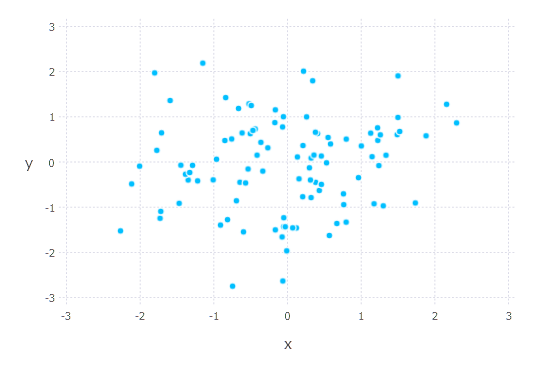

In [262]:
using Gadfly
srand(1) # second plot
x, y = randn(100), randn(100)
plot(x = x, y = y)

## <a name="macros"></a>Macros

You can define macros (see documentation for details). Useful standard macros.

Assertions:

In [263]:
@assert 1 == 2 "ERROR" # 2 macro arguments; error raised

LoadError: LoadError: AssertionError: ERROR
while loading In[263], in expression starting on line 1

In [264]:
using Base.Test # load Base.Test module
@test 1 == 2 # similar to assert; error

Test Failed
  Expression: 1 == 2
   Evaluated: 1 == 2


LoadError: LoadError: There was an error during testing
while loading In[264], in expression starting on line 2

In [265]:
@test_approx_eq 1 1.1 # error

LoadError: LoadError: assertion failed: |1 - 1.1| <= 2.220446049250313e-12
  1 = 1
  1.1 = 1.1
  difference = 0.10000000000000009 > 2.220446049250313e-12
while loading In[265], in expression starting on line 1

In [266]:
@test_approx_eq_eps 1 1.1 0.2 # no error

Function vectorization:

In [267]:
t(x::Float64, y::Float64 = 1.0) = x * y

t (generic function with 2 methods)

In [268]:
t(1.0, 2.0) # OK

2.0

In [269]:
t([1.0 2.0]) # error

LoadError: LoadError: MethodError: no method matching t(::Array{Float64,2})
Closest candidates are:
  t(!Matched::Float64, !Matched::Float64) at In[267]:1
  t(!Matched::Float64) at In[267]:1
while loading In[269], in expression starting on line 1

In [270]:
t.([1.0 2.0]) # OK

1×2 Array{Float64,2}:
 1.0  2.0

In [271]:
t([1.0 2.0], 2.0) # error

LoadError: LoadError: MethodError: no method matching t(::Array{Float64,2}, ::Float64)
Closest candidates are:
  t(!Matched::Float64, ::Float64) at In[267]:1
while loading In[271], in expression starting on line 1

In [272]:
t.([1.0 2.0], 2.0) # OK

1×2 Array{Float64,2}:
 2.0  4.0

In [273]:
t.(2.0, [1.0 2.0]) # OK

1×2 Array{Float64,2}:
 2.0  4.0

Benchmarking:

In [274]:
@time [x for x in 1:10^6].' # print time and memory

  0.054473 seconds (13.03 k allocations: 15.823 MB, 17.54% gc time)


1×1000000 Array{Int64,2}:
 1  2  3  4  5  6  7  8  9  10  11  12  …  999997  999998  999999  1000000

In [275]:
@timed [x for x in 1:10^6].' # return value, time and memory

(
[1 2 … 999999 1000000],

0.042444649,16591726,0.007871801,Base.GC_Diff(16591726,2,0,13028,0,0,7871801,1,0))

In [276]:
@elapsed [x for x in 1:10^6] # return time

0.047802306

In [277]:
@allocated [x for x in 1:10^6] # return memory

8000096

In [278]:
tic() # start timer

0x0000795bf2c8904c

In [279]:
toc() # stop timer and print time

elapsed time: 0.259225911 seconds


0.259225911

In [280]:
tic()
toq()

0.000116633